In [1]:
from sensor import sensor as sens
from actuator import actuator as act
from threshold import threshold as thr
from manager import manager
from signal_input import signal_input
import wire
from graphviz import Source, render

In [2]:
#Create manager that holds the threshold device
mng = manager(verbose = True)
#Create an input node
inp = signal_input()
#Create threshold nodes
t1 = thr(mng,1)
t2 = thr(mng,2)
t3 = thr(mng,2)
#Create output node/actuator
out = act(mng)

In [3]:
#Define connections between nodes 0-activate , 1-inhibit
t1.add_consumer(t2,0)
t1.add_consumer(t1,1)
t2.add_consumer(t3,0)
t2.add_consumer(t1,1)
t3.add_consumer(out,0)
inp.add_consumer(t1)
inp.add_consumer(t2)
inp.add_consumer(t3)

In [4]:
#Threshold node names
[t1.name, t2.name, t3.name]

['thr_596Y', 'thr_Z0CT', 'thr_X7LJ']

In [5]:
#Current node values
[t1.current, t2.current, t3.current]

[0, 0, 0]

In [6]:
#Display connections --> activation, --| inhibition.
mng.display()

thr_596Y --> thr_Z0CT with : wire_ZMB6
thr_596Y --| thr_596Y with : wire_QPMK
thr_Z0CT --> thr_X7LJ with : wire_ENWX
thr_Z0CT --| thr_596Y with : wire_IDWS
thr_X7LJ --> act_L87O with : wire_P3S8


In [7]:
#Generate the DOT representation of the manager/t. device
dot = mng.dot_generator(inp)
#Read the DOT file with graphviz
src = Source(dot)
#Create and save the graph
src.render(filename='3p_network', directory='3pulse-demo', format='png', cleanup=True)

digraph "device"{ graph [rankdir=LR] node [shape=circle] inp [color=black style=filled shape=circle label="" width=0.25] thr_596Y [label ="1"] thr_Z0CT [label ="2"] thr_X7LJ [label ="2"] thr_596Y -> thr_Z0CT [arrowhead="rnormal"] thr_596Y -> thr_596Y [arrowhead="tee"] thr_Z0CT -> thr_X7LJ [arrowhead="rnormal"] thr_Z0CT -> thr_596Y [arrowhead="tee"] thr_X7LJ -> act_L87O [arrowhead="rnormal"] inp -> thr_596Y [arrowhead="rnormal"] inp -> thr_Z0CT [arrowhead="rnormal"] inp -> thr_X7LJ [arrowhead="rnormal"]}


'3pulse-demo\\3p_network.png'

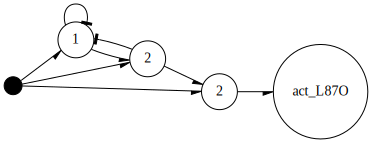

In [8]:
src

In [9]:
print(f"Initial thresholds : \n{mng.get_thresholds()}")

for i in range(3):
    #Send a signal
    inp.signal()
    #Update
    mng.update()

Initial thresholds : 
[0, 0, 0]
Thresholds at time 0 after the signal: 
[1, 1, 1]
Threshold outputs at time 0
thr_596Y --> wire_ZMB6
thr_596Y --| wire_QPMK
Thresholds at time 0 after threshold update: 
[0, 0, 0]
Wire outputs at time 0
thr_596Y --> thr_Z0CT with : wire_ZMB6
thr_596Y --| thr_596Y with : wire_QPMK
thr_Z0CT --- thr_X7LJ with : wire_ENWX
thr_Z0CT --- thr_596Y with : wire_IDWS
thr_X7LJ --- act_L87O with : wire_P3S8
Thresholds at time 0 after wire update: 
[-1, 1, 0]
Thresholds at time 1 after the signal: 
[0, 2, 1]
Threshold outputs at time 1
thr_Z0CT --> wire_ENWX
thr_Z0CT --| wire_IDWS
Thresholds at time 1 after threshold update: 
[0, 0, 0]
Wire outputs at time 1
thr_596Y --- thr_Z0CT with : wire_ZMB6
thr_596Y --- thr_596Y with : wire_QPMK
thr_Z0CT --> thr_X7LJ with : wire_ENWX
thr_Z0CT --| thr_596Y with : wire_IDWS
thr_X7LJ --- act_L87O with : wire_P3S8
Thresholds at time 1 after wire update: 
[-1, 0, 1]
Thresholds at time 2 after the signal: 
[0, 1, 2]
Threshold outputs 